In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import cv2
import numpy as np

import time

In [31]:
def image_from_rover(frame):
    '''
    Convert input image to the 
    moon-rover teleoperation translation.
    '''
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    thresh = 0.01
    if (np.random.random()<thresh):
        gray = add_artifacts(gray)
        cv2.imshow('frame',gray)
    
    thresh = 0.05
    if (np.random.random()<thresh):
        time.sleep(0.4)

    
    shifted = add_random_shift(gray)

    cross = add_dashed_cross(shifted)
    noisy = add_noise(cross)
    return noisy
    

In [3]:
def add_dashed_line(frame, x1,y1, x2, y2):
    '''
    Adds vertical or gorizontal dashed lines
    '''
    
    f_ = frame.copy()
    
    n = 62

    white_color = (255,255,255)

    step_size = np.max(np.abs([x1-x2, y1-y2]))/(n-1)


    for i in range(0,n,2):

        if (y1 == y2):
            x1_ = x1 + i * step_size
            x2_ = x1 + (i+1) * step_size
            cv2.line(f_, (int(x1_) ,y1),(int(x2_),y2),white_color,2)

        if (x1 == x2):
            y1_ = y1 + i * step_size
            y2_ = y1 + (i+1) * step_size
            cv2.line(f_, (x1,int(y1_)),(x2,int(y2_)),white_color,2)
        
    return f_

In [4]:
def add_dashed_cross(frame):
    '''
    Adds vertical and gorizontal dashed lines
    '''
    
    im = frame.copy()
    x, y = im.shape

    midle_x = int(x/2.)
    midle_y = int(y/2.)

    line_x = add_dashed_line(im, 0, midle_x, y, midle_x) 
    line_y = add_dashed_line(line_x, midle_y, 0, midle_y, x)
    
    return line_y

In [5]:
def add_noise(image,prob=0.02):
    '''
    Adds salt and peper noise and blur it
    '''
    output = image.copy()
    thres = 1 - prob 
    
    rdn = np.random.random(image.shape)
    
    output[rdn < prob] = 10
    output[rdn > thres] = 230       

    blurred = cv2.GaussianBlur(output,(7,7),0)
    
    return blurred

In [6]:
def add_artifacts(frame):
    im = frame.copy()
    
    blurred=cv2.GaussianBlur(im,(3,3),0)
    edges=cv2.Canny(blurred, 70, 180)
    
    return edges

In [58]:
def add_random_shift(frame):
    
    im = frame.copy()
    x = int (np.random.random() * frame.shape[0])
    h = int (np.random.random() * 10 + 1)
    w = int (np.random.random() * 20 - 10)
    
    thresh = 0.1
    if (np.random.random()<thresh):
        h = int (np.random.random() * frame.shape[1] * 0.5) 

    if w>0 :
        im[x:x+h,w:] = im[x:x+h,0:-w]
    elif w<0:
        im[x:x+h,:w] = im[x:x+h,-w:]

    return im

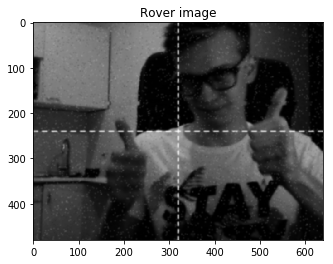

In [66]:
cap = cv2.VideoCapture(0)

ret, frame = cap.read()

rover_image = image_from_rover(frame)

# Display the resulting frame
plt.imshow(rover_image, cmap='gray'), plt.title('Rover image');

# When everything done, release the capture
cap.release()

# Run processing online

In [ ]:
cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = image_from_rover(frame)

    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()